## Clase 3: Código modular

### Vengo del futuro

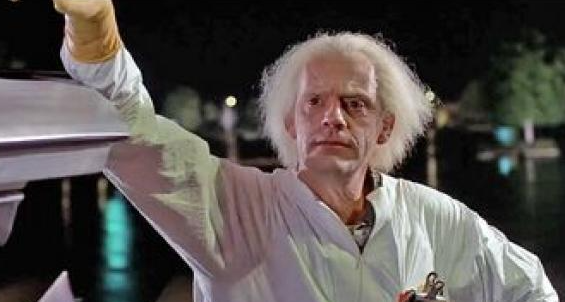

Deberías estar acá después de haber estado en la notebook de la clase_03.

Si intentás ejecutar la primera parte de esta notebook, hay partes que te van a pinchar porque ya nos cambiamos de posición:


In [9]:
!pwd

/home/hernan/paecis/clase_codigo_modular/notebooks


Con esto dicho, desde acá **bajá hasta donde nos quedamos!**

### 1. Consolidación de la data: `concatenar_csvs`

Nuestro objetivo: una función que tome un directorio y pegue todo en un solo archivo. Acá vamos a armar el camino que nos lleva de la notebook al código más profesional, reutilizable, compartible y etc etc etc, ya saben :)

In [8]:
# Esto es un copy paste casi literal de los pasos de la notebook pasada
import pandas as pd
import os # librería de python para interactuar con el sistema operativo
folder_path = 'data/raw/'  # Ruta de la carpeta


# Lista para almacenar dataframes
dataframes = []

# Iteramos sobre los archivos en la carpeta
for filename in os.listdir(folder_path): # por cada archivo en la carpeta,
    if filename.endswith('.csv'): # si el archivo termina con csv,
        file_path = os.path.join(folder_path, filename) # armame el path completo hacia el archivo, cosa de que pueda
        df = pd.read_csv(file_path) # leerlo con pandas
        dataframes.append(df) # y pegarlo a la lista vacía

# Concatenamos todos los dataframes de la lista en uno
df_combined = pd.concat(dataframes, ignore_index=True)

# Chau a la columna de más
df_clean = df_combined.drop('Unnamed: 0', axis=1)

# Convertimos la columna 'timestamp' a formato datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y%m%d%H%M%S')

# Ordenamos el DataFrame por 'timestamp'
df_clean.sort_values(by='timestamp', inplace=True)

# Configuramos el índice del DataFrame con la columna 'timestamp'
df_clean.set_index('timestamp', inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/'

In [9]:
def concatenar_csvs(ruta):
    folder_path = ruta  # Las ruta va a ser el argumento de la función


    # Lista para almacenar dataframes
    dataframes = []

    # Iteramos sobre los archivos en la carpeta
    for filename in os.listdir(folder_path): # por cada archivo en la carpeta,
        if filename.endswith('.csv'): # si el archivo termina con csv,
            file_path = os.path.join(folder_path, filename) # armame el path completo hacia el archivo, cosa de que pueda
            df = pd.read_csv(file_path) # leerlo con pandas
            dataframes.append(df) # y pegarlo a la lista vacía

    # Concatenamos todos los dataframes de la lista en uno
    df_combined = pd.concat(dataframes, ignore_index=True)

    # Chau a la columna de más
    df_clean = df_combined.drop('Unnamed: 0', axis=1)

    # Convertimos la columna 'timestamp' a formato datetime
    df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y%m%d%H%M%S')

    # Ordenamos el DataFrame por 'timestamp'
    df_clean.sort_values(by='timestamp', inplace=True)

    # Configuramos el índice del DataFrame con la columna 'timestamp'
    df_clean.set_index('timestamp', inplace=True)

    return df_clean # el resultado es que te devuelve el df limpio

In [4]:
import pandas as pd
df_unico = pd.read_csv('data/raw/prices_20240711112802.csv')
df_unico

,Unnamed: 0,symbol,price,timestamp
0,0,BTCUSDT,57754.17,20240711112802
1,0,ETHUSDT,3139.75,20240711112802


In [10]:
folder_path = 'data/raw/' 
df_junto = concatenar_csvs(folder_path)
df_junto

,symbol,price
timestamp,,
2024-07-11 11:26:03,BTCUSDT,57731.17
2024-07-11 11:26:03,ETHUSDT,3138.79
2024-07-11 11:27:02,BTCUSDT,57774.00
2024-07-11 11:27:02,ETHUSDT,3140.87
2024-07-11 11:28:02,BTCUSDT,57754.17
...,...,...
2024-07-11 14:53:02,ETHUSDT,3134.83
2024-07-11 14:54:02,BTCUSDT,57884.00
2024-07-11 14:54:02,ETHUSDT,3134.29


In [2]:
import os
# Existe la carpeta? Sino, la creamos.
output_dir_btc = 'src' # convención (una de muchas posibles)
os.makedirs(output_dir_btc, exist_ok=True)

In [ ]:
# Descomentalo para correrlo, pero ojo que podés romper algo de después 
#
#

# %%writefile src/utils.py
# import os # necesitamos también importar las librerías acá
# import pandas as pd

# def concatenar_csvs(ruta):
#     folder_path = ruta  # Las ruta va a ser el argumento de la función


#     # Lista para almacenar dataframes
#     dataframes = []

#     # Iteramos sobre los archivos en la carpeta
#     for filename in os.listdir(folder_path): # por cada archivo en la carpeta,
#         if filename.endswith('.csv'): # si el archivo termina con csv,
#             file_path = os.path.join(folder_path, filename) # armame el path completo hacia el archivo, cosa de que pueda
#             df = pd.read_csv(file_path) # leerlo con pandas
#             dataframes.append(df) # y pegarlo a la lista vacía

#     # Concatenamos todos los dataframes de la lista en uno
#     df_combined = pd.concat(dataframes, ignore_index=True)

#     # Chau a la columna de más
#     df_clean = df_combined.drop('Unnamed: 0', axis=1)

#     # Convertimos la columna 'timestamp' a formato datetime
#     df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y%m%d%H%M%S')

#     # Ordenamos el DataFrame por 'timestamp'
#     df_clean.sort_values(by='timestamp', inplace=True)

#     # Configuramos el índice del DataFrame con la columna 'timestamp'
#     df_clean.set_index('timestamp', inplace=True)

#     return df_clean # el resultado es que te devuelve el df limpio



Writing src/utils.py


In [12]:
!head src/utils.py

import os # necesitamos también importar las librerías acá
import pandas as pd

def concatenar_csvs(ruta):
    folder_path = ruta  # Las ruta va a ser el argumento de la función


    # Lista para almacenar dataframes
    dataframes = []



In [15]:
!touch src/__init__.py

In [16]:
from src.utils import concatenar_csvs

In [17]:
nuevo_test = concatenar_csvs(folder_path)
nuevo_test

,symbol,price
timestamp,,
2024-07-11 11:26:03,BTCUSDT,57731.17
2024-07-11 11:26:03,ETHUSDT,3138.79
2024-07-11 11:27:02,BTCUSDT,57774.00
2024-07-11 11:27:02,ETHUSDT,3140.87
2024-07-11 11:28:02,BTCUSDT,57754.17
...,...,...
2024-07-11 14:53:02,ETHUSDT,3134.83
2024-07-11 14:54:02,BTCUSDT,57884.00
2024-07-11 14:54:02,ETHUSDT,3134.29


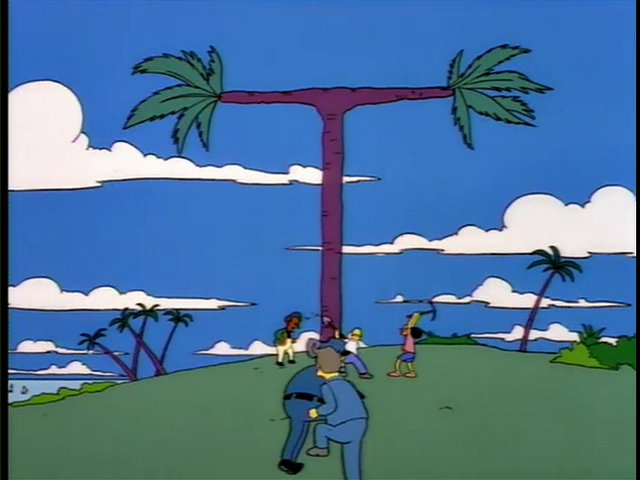

Sigamos nomás:

In [12]:
import os
import pandas

from src.utils import concatenar_csvs
folder_path = 'data/raw/'

df = concatenar_csvs(folder_path)
df


ModuleNotFoundError: No module named 'src'

¿Epa, qué pasó? Acá viene una de las cosas tan agridulces que tiene Python: que en algún punto te fuerza a ser más prolijo para hacer ciertas cosas.

Para poder usar nuestro código desde la carpeta `notebooks`, Python nos pide que lo instalemos como paquete, y para eso vamos a usar la librería `setuptools`. Nuestra nueva tarea es preparar un archivo llamado `setup.py`, a nivel de root, donde le especificamos a nuestro paquete-a-ser-creado qué dependencias tiene y dónde está el código que lo va a componer.

Y si la serpiente python nos obliga a crear nuestro propio Pandas para laburar, cómo podemos ponerle a nuestro paquete sino...

In [13]:
%%writefile ../setup.py
from setuptools import setup, find_packages

setup(
    name='carpinchos',
    version='0.1',
    packages=find_packages(where='src'), # le dice a setuptools que busque paquetes dentro del directorio src
    package_dir={'': 'src'},  # le dice a setuptools que esta es la raíz, y de dónde tiene que sacar los paquetes que instala
    install_requires=[
        'pandas', 'scikit-learn', 'click' # Agrega cualquier la dependencia que necesites
    ],
)



Overwriting ../setup.py


Usando bash como ya vimos, nos movemos una carpeta hacia afuera, y luego instalamos con `pip install -e .`. Básicamente:
- El `-e` quiere decir modo editable, cualquier cambio en el código se reflejará inmediatamente sin necesidad de reinstalar el paquete.
- Con `.` busca en ese lugar lo que tiene que instalar.

In [14]:
!cd .. && pip install -e .

Obtaining file:///home/hernan/paecis/clase_codigo_modular
  Preparing metadata (setup.py) ... done
  Running setup.py develop for carpinchos


In [15]:
# reiniciamos 
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}

: 

In [1]:
# momento de la verdad: le pedimos que importe la funcion en utils.py
from utils import concatenar_csvs

In [2]:
folder_path = '../data/raw/' # estoy dentro de la carpeta "Notebooks" ahora
df = concatenar_csvs(folder_path)
df

,symbol,price
timestamp,,
2024-07-11 11:26:03,BTCUSDT,57731.17
2024-07-11 11:26:03,ETHUSDT,3138.79
2024-07-11 11:27:02,BTCUSDT,57774.00
2024-07-11 11:27:02,ETHUSDT,3140.87
2024-07-11 11:28:02,BTCUSDT,57754.17
...,...,...
2024-07-11 14:53:02,ETHUSDT,3134.83
2024-07-11 14:54:02,BTCUSDT,57884.00
2024-07-11 14:54:02,ETHUSDT,3134.29


Con esta renovada sensación de victoria, ¡seguimos adelante!

### 2. Feature engineering: `preparar_data`
Vamos con la que sigue:

In [5]:
import pandas as pd

df = pd.read_csv('../data/stage/data_consolidada.csv') # atenti al path, nos movimos
df_consolidado = df.copy() # para probar después
df.head()

,timestamp,symbol,price
0,2024-07-11 11:26:03,BTCUSDT,57731.17
1,2024-07-11 11:26:03,ETHUSDT,3138.79
2,2024-07-11 11:27:02,BTCUSDT,57774.00
3,2024-07-11 11:27:02,ETHUSDT,3140.87
4,2024-07-11 11:28:02,BTCUSDT,57754.17


In [6]:
# Ya vimos que para operar con la serie, necesitamos convertirla a  datetime y configurarla como índice
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['second'] = df.index.second
df['microsecond'] = df.index.microsecond
df['nanosecond'] = df.index.nanosecond

df['price_lag_1'] = df.groupby('symbol')['price'].shift(1) # agrupá por símbolo para no mezclar - dame el precio, y correlo uno para atrás
df['price_lag_2'] = df.groupby('symbol')['price'].shift(2) # agrupá por símbolo para no mezclar - dame el precio, y correlo dos para atrás

# Calculamos la media móvil y desviación estándar de ventana de 2 y 3 periodos.
# la primera usa esta lambda que asignamos a la variable ventana_2
df['rolling_mean_2'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=2).mean())
df['rolling_std_2'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=2).std())

# esta usa una lambda como la usarías normalmente (sin asignarla), la única diferencia es que la ventana es de 3 en vez de 2
df['rolling_mean_3'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).mean())
df['rolling_std_3'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).std())

df['ema_3'] = df.groupby('symbol')['price'].transform(lambda x: x.ewm(span=3, adjust=False).mean())
# Differencing
df['price_diff'] = df.groupby('symbol')['price'].diff()

# Llenar NaNs para características rezagadas (lag features)
df['price_lag_1'] = df['price_lag_1'].ffill().bfill() # primero llená para adelante, si tiene nulo, llená para atrás. encadenamiento
df['price_lag_2'] = df['price_lag_2'].ffill().bfill()

# Llenar NaNs para estadísticas móviles (rolling statistics) con la media de la columna
df['rolling_mean_2'] = df['rolling_mean_2'].fillna(df['rolling_mean_2'].mean())
df['rolling_std_2'] = df['rolling_std_2'].fillna(df['rolling_std_2'].mean())
df['rolling_mean_3'] = df['rolling_mean_3'].fillna(df['rolling_mean_3'].mean())
df['rolling_std_3'] = df['rolling_std_3'].fillna(df['rolling_std_3'].mean())
df['price_diff'] = df['price_diff'].ffill().bfill()

df.head()



,symbol,price,hour,minute,second,microsecond,nanosecond,price_lag_1,price_lag_2,rolling_mean_2,rolling_std_2,rolling_mean_3,rolling_std_3,ema_3,price_diff
timestamp,,,,,,,,,,,,,,,
2024-07-11 11:26:03,BTCUSDT,57731.17,11,26,3,0,0,57731.17,57731.17,30417.533445,12.840315,30417.242660,15.730297,57731.1700,42.83
2024-07-11 11:26:03,ETHUSDT,3138.79,11,26,3,0,0,57731.17,57731.17,30417.533445,12.840315,30417.242660,15.730297,3138.7900,42.83
2024-07-11 11:27:02,BTCUSDT,57774.00,11,27,2,0,0,57731.17,57731.17,57752.585000,30.285383,30417.242660,15.730297,57752.5850,42.83
2024-07-11 11:27:02,ETHUSDT,3140.87,11,27,2,0,0,3138.79,57731.17,3139.830000,1.470782,30417.242660,15.730297,3139.8300,2.08
2024-07-11 11:28:02,BTCUSDT,57754.17,11,28,2,0,0,57774.00,57731.17,57764.085000,14.021927,57753.113333,21.434543,57753.3775,-19.83


In [7]:
def preparar_data(data):
    df = data.copy() # SIEMPRE vamos a operar sobre una copia
    # Ya vimos que para operar con la serie, necesitamos convertirla a  datetime y configurarla como índice
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['second'] = df.index.second
    df['microsecond'] = df.index.microsecond
    df['nanosecond'] = df.index.nanosecond

    df['price_lag_1'] = df.groupby('symbol')['price'].shift(1) # agrupá por símbolo para no mezclar - dame el precio, y correlo uno para atrás
    df['price_lag_2'] = df.groupby('symbol')['price'].shift(2) # agrupá por símbolo para no mezclar - dame el precio, y correlo dos para atrás

    # Calculamos la media móvil y desviación estándar de ventana de 2 y 3 periodos.
    # la primera usa esta lambda que asignamos a la variable ventana_2
    df['rolling_mean_2'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=2).mean())
    df['rolling_std_2'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=2).std())

    # esta usa una lambda como la usarías normalmente (sin asignarla), la única diferencia es que la ventana es de 3 en vez de 2
    df['rolling_mean_3'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).mean())
    df['rolling_std_3'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).std())

    df['ema_3'] = df.groupby('symbol')['price'].transform(lambda x: x.ewm(span=3, adjust=False).mean())
    # Differencing
    df['price_diff'] = df.groupby('symbol')['price'].diff()

    # Llenar NaNs para características rezagadas (lag features)
    df['price_lag_1'] = df['price_lag_1'].ffill().bfill() # primero llená para adelante, si tiene nulo, llená para atrás. encadenamiento
    df['price_lag_2'] = df['price_lag_2'].ffill().bfill()

    # Llenar NaNs para estadísticas móviles (rolling statistics) con la media de la columna
    df['rolling_mean_2'] = df['rolling_mean_2'].fillna(df['rolling_mean_2'].mean())
    df['rolling_std_2'] = df['rolling_std_2'].fillna(df['rolling_std_2'].mean())
    df['rolling_mean_3'] = df['rolling_mean_3'].fillna(df['rolling_mean_3'].mean())
    df['rolling_std_3'] = df['rolling_std_3'].fillna(df['rolling_std_3'].mean())
    df['price_diff'] = df['price_diff'].ffill().bfill()

    return df    

In [8]:
test = preparar_data(df_consolidado)
test

,symbol,price,hour,minute,second,microsecond,nanosecond,price_lag_1,price_lag_2,rolling_mean_2,rolling_std_2,rolling_mean_3,rolling_std_3,ema_3,price_diff
timestamp,,,,,,,,,,,,,,,
2024-07-11 11:26:03,BTCUSDT,57731.17,11,26,3,0,0,57731.17,57731.17,30417.533445,12.840315,30417.242660,15.730297,57731.170000,42.83
2024-07-11 11:26:03,ETHUSDT,3138.79,11,26,3,0,0,57731.17,57731.17,30417.533445,12.840315,30417.242660,15.730297,3138.790000,42.83
2024-07-11 11:27:02,BTCUSDT,57774.00,11,27,2,0,0,57731.17,57731.17,57752.585000,30.285383,30417.242660,15.730297,57752.585000,42.83
2024-07-11 11:27:02,ETHUSDT,3140.87,11,27,2,0,0,3138.79,57731.17,3139.830000,1.470782,30417.242660,15.730297,3139.830000,2.08
2024-07-11 11:28:02,BTCUSDT,57754.17,11,28,2,0,0,57774.00,57731.17,57764.085000,14.021927,57753.113333,21.434543,57753.377500,-19.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-11 14:53:02,ETHUSDT,3134.83,14,53,2,0,0,3134.52,3132.35,3134.675000,0.219203,3133.900000,1.351259,3134.208463,0.31
2024-07-11 14:54:02,BTCUSDT,57884.00,14,54,2,0,0,57904.00,57916.01,57894.000000,14.142136,57901.336667,16.170344,57890.604015,-20.00
2024-07-11 14:54:02,ETHUSDT,3134.29,14,54,2,0,0,3134.83,3134.52,3134.560000,0.381838,3134.546667,0.270986,3134.249232,-0.54


Si recordás la notebook de donde venimos, en la parte del `utils.py` decía que había que tener cuidado con esa celda, y es por esta misma razón: vamos a ir copiando y pegando las funciones a medida que las hacemos. Así que copiá, y pegá en ese archivo.

### 3. Estandarización: `normalizar_crypto`
Ya que entramos en calor, vamos con algunas cosas más.

In [9]:
from sklearn.preprocessing import StandardScaler

# Para hacerla fácil, armamos una lista con las columnas a normalizar
columns_to_normalize = ['price_lag_1', 'price_lag_2', 'rolling_mean_2', 'rolling_std_2', 'rolling_mean_3', 'rolling_std_3', 'ema_3', 'price_diff']

# Z-score
scaler = StandardScaler() # instanciamos el objeto que escala

df_btc = df[df['symbol'] == 'BTCUSDT']
df_btc[columns_to_normalize] = scaler.fit_transform(df_btc[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar

df_btc.head()

/tmp/ipykernel_99979/2414182612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc[columns_to_normalize] = scaler.fit_transform(df_btc[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


,symbol,price,hour,minute,second,microsecond,nanosecond,price_lag_1,price_lag_2,rolling_mean_2,rolling_std_2,rolling_mean_3,rolling_std_3,ema_3,price_diff
timestamp,,,,,,,,,,,,,,,
2024-07-11 11:26:03,BTCUSDT,57731.17,11,26,3,0,0,0.160828,0.165169,-14.389048,-0.578702,-10.174241,-0.716086,0.164346,0.952159
2024-07-11 11:27:02,BTCUSDT,57774.00,11,27,2,0,0,0.160828,0.165169,0.095757,0.311112,-10.174241,-0.716086,0.283216,0.952159
2024-07-11 11:28:02,BTCUSDT,57754.17,11,28,2,0,0,0.393979,0.165169,0.101851,-0.518432,0.117359,-0.421061,0.287615,-0.468589
2024-07-11 11:29:02,BTCUSDT,57790.00,11,29,2,0,0,0.286032,0.398856,0.106090,0.058642,0.124741,-0.601329,0.389257,0.793442
2024-07-11 11:30:02,BTCUSDT,57766.11,11,30,2,0,0,0.481077,0.290661,0.109253,-0.371999,0.123751,-0.586071,0.373774,-0.560645


Acá se nos presenta un desafío: la normalización requiere sí o sí que separemos por crypto. Entonces nuestra flamante función requiere un argumento adicional.

In [10]:
def normalizar_crypto(data, crypto):
    # como siempre, la copia
    df = data.copy()

    # dependiendo de qué elegimos, va a hacer cosas distintas
    # nunca está de más hacerte impresiones a pantalla, y recordar ser lo más claros y precisos posibles
    if crypto == 'btc':
        subset_df = df[df['symbol'] == 'BTCUSDT']
        print("Subset de datos para Bitcoin (btc) listo.")

    elif crypto == 'eth':
        subset_df = df[df['symbol'] == 'ETHUSDT']
        print("Subset de datos para Ethereum (eth) listo.")
    
    else:
        # Si no da alguno de los dos, que tire error. Esto es lo que se conoce como "manejo de errores" (intro a)
        raise ValueError(f"El valor '{crypto}' no es válido para 'crypto'. Debe ser 'eth' o 'btc'.")
    
    # lo mismo de antes
    columns_to_normalize = ['price_lag_1', 'price_lag_2', 'rolling_mean_2', 'rolling_std_2', 'rolling_mean_3', 'rolling_std_3', 'ema_3', 'price_diff']

    # Z-score
    scaler = StandardScaler() # instanciamos el objeto que escala
    subset_df[columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar
    
    print("Normalización lista.")
    return subset_df

In [11]:
normalizar_crypto(test)

TypeError: normalizar_crypto() missing 1 required positional argument: 'crypto'

In [12]:
normalizar_crypto(test, 'eth')

Subset de datos para Ethereum (eth) listo.
Normalización lista.


/tmp/ipykernel_99979/1614980234.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


,symbol,price,hour,minute,second,microsecond,nanosecond,price_lag_1,price_lag_2,rolling_mean_2,rolling_std_2,rolling_mean_3,rolling_std_3,ema_3,price_diff
timestamp,,,,,,,,,,,,,,,
2024-07-11 11:26:03,ETHUSDT,3138.79,11,26,3,0,0,14.456745,10.198008,14.456487,8.398249,10.197918,7.981812,0.425826,10.919924
2024-07-11 11:27:02,ETHUSDT,3140.87,11,27,2,0,0,-0.067703,10.198008,-0.065675,-0.017694,10.197918,7.981812,0.506522,0.483939
2024-07-11 11:28:02,ETHUSDT,3139.75,11,28,2,0,0,-0.067149,-0.097016,-0.065419,-0.520171,-0.095582,-0.486499,0.503419,-0.335573
2024-07-11 11:29:02,ETHUSDT,3141.77,11,29,2,0,0,-0.067447,-0.096624,-0.065180,-0.049099,-0.095207,-0.503235,0.580235,0.468574
2024-07-11 11:30:02,ETHUSDT,3141.12,11,30,2,0,0,-0.066910,-0.096835,-0.064815,-0.766175,-0.095176,-0.492183,0.593426,-0.215208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-11 14:51:02,ETHUSDT,3132.35,14,51,2,0,0,-0.069403,-0.097769,-0.069644,-1.080224,-0.098080,-0.279379,-0.050291,-0.061549
2024-07-11 14:52:02,ETHUSDT,3134.52,14,52,2,0,0,-0.069416,-0.098221,-0.069079,0.029413,-0.098115,-0.372558,0.022108,0.506988
2024-07-11 14:53:02,ETHUSDT,3134.83,14,53,2,0,0,-0.068839,-0.098231,-0.068419,-0.944136,-0.097810,-0.307650,0.070334,0.030646


In [19]:
normalizar_crypto(test, 'btc')

Subset de datos para Bitcoin (btc) listo.
Normalización lista.


/tmp/ipykernel_73324/1087811501.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


,symbol,price,hour,minute,second,microsecond,nanosecond,price_lag_1,price_lag_2,rolling_mean_2,rolling_std_2,rolling_mean_3,rolling_std_3,ema_3,price_diff
timestamp,,,,,,,,,,,,,,,
2024-07-11 11:26:03,BTCUSDT,57731.17,11,26,3,0,0,0.160828,0.165169,-14.389048,-0.578702,-10.174241,-0.716086,0.164346,0.952159
2024-07-11 11:27:02,BTCUSDT,57774.00,11,27,2,0,0,0.160828,0.165169,0.095757,0.311112,-10.174241,-0.716086,0.283216,0.952159
2024-07-11 11:28:02,BTCUSDT,57754.17,11,28,2,0,0,0.393979,0.165169,0.101851,-0.518432,0.117359,-0.421061,0.287615,-0.468589
2024-07-11 11:29:02,BTCUSDT,57790.00,11,29,2,0,0,0.286032,0.398856,0.106090,0.058642,0.124741,-0.601329,0.389257,0.793442
2024-07-11 11:30:02,BTCUSDT,57766.11,11,30,2,0,0,0.481077,0.290661,0.109253,-0.371999,0.123751,-0.586071,0.373774,-0.560645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-11 14:51:02,BTCUSDT,57869.79,14,51,2,0,0,0.844384,1.097242,0.154406,-0.762967,0.163690,-0.324780,0.906221,0.276930
2024-07-11 14:52:02,BTCUSDT,57916.01,14,52,2,0,0,0.915423,0.850297,0.170110,0.433379,0.165448,0.081090,1.048287,1.029024
2024-07-11 14:53:02,BTCUSDT,57904.00,14,53,2,0,0,1.167027,0.921500,0.179174,-0.800477,0.171379,-0.289300,1.085988,-0.291279


In [13]:
normalizar_crypto(test, 'hola')

ValueError: El valor 'hola' no es válido para 'crypto'. Debe ser 'eth' o 'btc'.

In [14]:
# reiniciamos 
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}

: 

In [1]:
import pandas as pd
import os
from utils import concatenar_csvs, preparar_data, normalizar_crypto

In [2]:
path = '../data/raw'
df_concatenado = concatenar_csvs(path)
print(df_concatenado.head())

df_preparado = preparar_data(df_concatenado)
print(df_preparado.head())

df_eth_normalizado = normalizar_crypto(df_preparado, 'eth')
df_eth_normalizado.head()

                      symbol     price
timestamp                             
2024-07-11 11:26:03  BTCUSDT  57731.17
2024-07-11 11:26:03  ETHUSDT   3138.79
2024-07-11 11:27:02  BTCUSDT  57774.00
2024-07-11 11:27:02  ETHUSDT   3140.87
2024-07-11 11:28:02  BTCUSDT  57754.17


KeyError: 'timestamp'

Eeeeeeeeeeeeeh, viejo, ¿qué pasó? ¿Es el machine learning y la ciencia de datos una mentira?

A ver, veamos un poco...

In [3]:
df_concatenado.head()

,symbol,price
timestamp,,
2024-07-11 11:26:03,BTCUSDT,57731.17
2024-07-11 11:26:03,ETHUSDT,3138.79
2024-07-11 11:27:02,BTCUSDT,57774.00
2024-07-11 11:27:02,ETHUSDT,3140.87
2024-07-11 11:28:02,BTCUSDT,57754.17


Vamos desde el principio, y miremos `preparar_data`. Lo bueno de ser prolijos es que podemos volver bastante fácil sobre nuestros pasos. 

Veamos la primera parte de la operación:

In [7]:
# Corremos solo esta parte y reproducimos el error
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace=True)

Ahí nos cae la ficha: por el nuevo flujo de trabajo modularizado, ya no tenemos que transformar la columna a tipo `timestamp` porque la dejamos exactamente como la necesitamos. Cuando la segunda parte busca la columna de nombre `timestamp`, no existe. Vamos al `utils.py`, comentamos esas celdas y vemos qué pasa, reiniciando una vez más el kernel para que carguen las modificaciones.

In [ ]:
# reiniciamos 
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 

In [1]:
import pandas as pd
import os
from utils import concatenar_csvs, preparar_data, normalizar_crypto

In [2]:
path = '../data/raw'
df_concatenado = concatenar_csvs(path)
print(df_concatenado.head())

df_preparado = preparar_data(df_concatenado)
print(df_preparado.head())

df_eth_normalizado = normalizar_crypto(df_preparado, 'eth')
df_eth_normalizado.head()

                      symbol     price
timestamp                             
2024-07-11 11:26:03  BTCUSDT  57731.17
2024-07-11 11:26:03  ETHUSDT   3138.79
2024-07-11 11:27:02  BTCUSDT  57774.00
2024-07-11 11:27:02  ETHUSDT   3140.87
2024-07-11 11:28:02  BTCUSDT  57754.17
                      symbol     price  hour  minute  second  microsecond  \
timestamp                                                                   
2024-07-11 11:26:03  BTCUSDT  57731.17    11      26       3            0   
2024-07-11 11:26:03  ETHUSDT   3138.79    11      26       3            0   
2024-07-11 11:27:02  BTCUSDT  57774.00    11      27       2            0   
2024-07-11 11:27:02  ETHUSDT   3140.87    11      27       2            0   
2024-07-11 11:28:02  BTCUSDT  57754.17    11      28       2            0   

                     nanosecond  price_lag_1  price_lag_2  rolling_mean_2  \
timestamp                                                                   
2024-07-11 11:26:03           0  

/home/hernan/paecis/clase_codigo_modular/src/utils.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


,symbol,price,hour,minute,second,microsecond,nanosecond,price_lag_1,price_lag_2,rolling_mean_2,rolling_std_2,rolling_mean_3,rolling_std_3,ema_3,price_diff
timestamp,,,,,,,,,,,,,,,
2024-07-11 11:26:03,ETHUSDT,3138.79,11,26,3,0,0,14.456745,10.198008,14.456487,8.398249,10.197918,7.981812,0.425826,10.919924
2024-07-11 11:27:02,ETHUSDT,3140.87,11,27,2,0,0,-0.067703,10.198008,-0.065675,-0.017694,10.197918,7.981812,0.506522,0.483939
2024-07-11 11:28:02,ETHUSDT,3139.75,11,28,2,0,0,-0.067149,-0.097016,-0.065419,-0.520171,-0.095582,-0.486499,0.503419,-0.335573
2024-07-11 11:29:02,ETHUSDT,3141.77,11,29,2,0,0,-0.067447,-0.096624,-0.065180,-0.049099,-0.095207,-0.503235,0.580235,0.468574
2024-07-11 11:30:02,ETHUSDT,3141.12,11,30,2,0,0,-0.066910,-0.096835,-0.064815,-0.766175,-0.095176,-0.492183,0.593426,-0.215208


### 5. Modelo de ML: `entrenar_modelo`
Y al final, la frutilla del postre...

In [3]:
# es un copypaste de la clase_02 pero apuntando al df que tenemos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# necesitamos los features y el target
target = df_eth_normalizado.pop('price') 

# sacamos la columna de símbolo, micro y nanosegundo (todas iguales) y el timestamp, siendo que nos quedamos con sus características extraídas
features = df_eth_normalizado.drop(columns=['symbol', 'microsecond', 'nanosecond'])

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Hagamos el famoso predict sobre los datos de prueba
y_pred = model.predict(X_test)
# evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.4721845425794956e-24
R^2 Score: 1.0


Llego el momento de que nuestro esfuerzo culmine en un bello pepinillo.

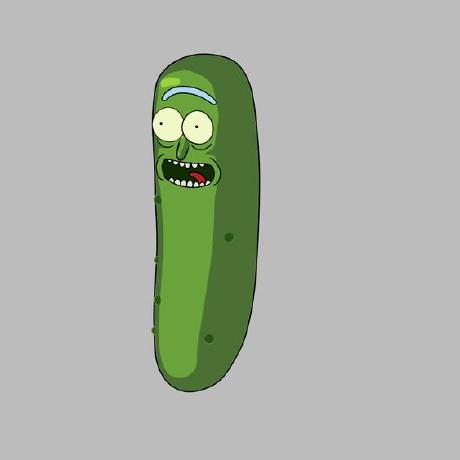

Vamos a agregarle a nuestra función la opción de guardar el modelo en disco. Este es el final del ciclo: desde la carpeta de los csvs, a un archivo listo y hecho por nosotros. 

In [5]:
import pickle # la importé acá porque lo de abajo sino no va a andar


In [6]:
def entrenar_modelo(data, persistir=False): # por default va a ser falso
    df = data.copy()
    # necesitamos los features y el target
    target = df.pop('price') # modifico el df nomás pero es copiar y pegar la anterior

    # sacamos la columna de símbolo, micro y nanosegundo (todas iguales) y el timestamp, siendo que nos quedamos con sus características extraídas
    features = df.drop(columns=['symbol', 'microsecond', 'nanosecond'])

    # Dividimos en train y test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hagamos el famoso predict sobre los datos de prueba
    y_pred = model.predict(X_test)
    # evaluación del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Le ponemos un poco de onda
    print(f'Entrenamiento completo.')
    print(f'El modelo tuvo un MSE de {mse}.')
    print(f'El modelo tuvo un R2 de {r2}.')

    # acá la papa: si le dijiste que persista...
    if persistir == True:
        # Existe la carpeta? Sino, la creamos. (OOOOOOOOOOOH)
        output_dir = 'models'
        os.makedirs(output_dir, exist_ok=True)
        # Aprovechamos la variable name para obtener el nombre del algoritmo
        nombre_algoritmo = type(model).__name__

        # Pegamos ambas cosas, agregando la extensión pkl al final
        path_modelo = f'{output_dir}/{nombre_algoritmo}.pkl'

        # Abrir el archivo en modo binario de escritura
        with open(path_modelo, 'wb') as archivo:
            # Serializar y guardar el objeto en el archivo
            pickle.dump(model, archivo)
            # The golden rule: notificá
            print(f'El modelo fue guardado en {path_modelo}')
    
    # ... y sino, devolveme el modelo a una variable que asigne
    else:
        return model
     


    

¿Vemos qué sale?

In [7]:
modelo = entrenar_modelo(df_eth_normalizado)

KeyError: 'price'

... víctima de mi propia programación (?).

¿Se acuerdan que les contaba del método `pop`? Bueno, básicamente cuando lo sacamos para probar antes el dataframe, sacamos la columna del target. Vamos de nuevo a levantar el df (scrolleo arriba y corro de nuevo la celda) y vemos qué pasa.

In [12]:
# corroboremos que está
df_eth_normalizado = normalizar_crypto(df_preparado, 'eth')
df_eth_normalizado.columns

Subset de datos para Ethereum (eth) listo.
Normalización lista.


/home/hernan/paecis/clase_codigo_modular/src/utils.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


Index(['symbol', 'price', 'hour', 'minute', 'second', 'microsecond',
       'nanosecond', 'price_lag_1', 'price_lag_2', 'rolling_mean_2',
       'rolling_std_2', 'rolling_mean_3', 'rolling_std_3', 'ema_3',
       'price_diff'],
      dtype='object')

In [13]:
modelo = entrenar_modelo(df_eth_normalizado)

Entrenamiento completo.
El modelo tuvo un MSE de 1.4721845425794956e-24.
El modelo tuvo un R2 de 1.0.


In [17]:
modelo.coef_

array([-3.59459720e-13, -1.42108547e-14, -7.53066293e-13, -3.75385644e+03,
        2.22672297e-09,  3.75430244e+03, -1.84154160e-12, -2.22670788e-09,
        1.46556322e-12, -5.80156459e-12,  2.49220620e-03])

In [15]:
entrenar_modelo(df_eth_normalizado, persistir=True)

Entrenamiento completo.
El modelo tuvo un MSE de 1.4721845425794956e-24.
El modelo tuvo un R2 de 1.0.
El modelo fue guardado en models/LinearRegression.pkl


In [16]:
!ls

'clase_03b copy.ipynb'	 clase_03b.ipynb   models


Vemos que si lo hacemos persistir nos guarda en una carpeta que crea dentro de la carpeta de `notebooks`. Esto es tan poco aesthetic que duele. 

Es cierto que perfectamente podemos modificar el script para que el path sea el correcto, pero vamos a ir por otro camino y lo vamos a arreglar un poco más adelante. Mientras tanto, ¿probamos el punta a punta otra vez con el BTC?

In [18]:
import pandas as pd
import os
from utils import concatenar_csvs, preparar_data, normalizar_crypto, entrenar_modelo

path = '../data/raw'

df_concatenado = concatenar_csvs(path)
df_preparado = preparar_data(df_concatenado)
df_btc_normalizado = normalizar_crypto(df_preparado, 'btc')
model_btc = entrenar_modelo(df_btc_normalizado)

Subset de datos para Bitcoin (btc) listo.
Normalización lista.
Entrenamiento completo.
El modelo tuvo un MSE de 5.293955920339377e-23.
El modelo tuvo un R2 de 1.0.


/home/hernan/paecis/clase_codigo_modular/src/utils.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar


Pandas genera esta advertencia para advertirte que podrías no estar modificando el DataFrame original como esperas.

Para resolver este problema, es mejor usar .loc para asegurarte de que estás modificando el DataFrame original y no una copia. 

### 6. This isn't even my final form: `main.py`

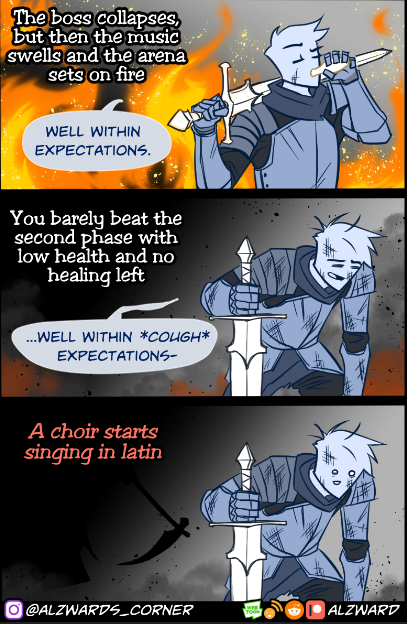

Llegó el momento de armar nuestro primer ejecutable pasado de rosca. Para terminar esta etapa, antes aprovechamos y emprolijamos dos cosas:

- Vamos a modificar las funciones para que se determinen cuáles son las columnas a subsetear y utilizar en la práctica (es decir, no hacer drops o pops, sino pasarle la lista de columnas, que es mucho menos propenso a errores). Esta fue la curva que nos comimos con el `.pop` unos pasos más atrás.
- Vamos a modificar la normalización para incorporar la sugerencia del warning. Si lo dicen es por algo.

Una vez tengamos esto más lindo, procedemos a armar el main. 

Esto lo vamos a hacer copiando y pegando el `utils.py` acá abajo y editándolo, y vamos a guardarlo en otro archivo, al cual ahora sí le pondremos `carpincho.py` únicamente para diferenciarlo. En el camino, voy a buscar cosas que necesito, tal y como...

In [5]:
# la lista de columnas que tengo que editar después
df_eth_normalizado.columns

Index(['symbol', 'price', 'hour', 'minute', 'second', 'microsecond',
       'nanosecond', 'price_lag_1', 'price_lag_2', 'rolling_mean_2',
       'rolling_std_2', 'rolling_mean_3', 'rolling_std_3', 'ema_3',
       'price_diff'],
      dtype='object')

In [6]:
# el nombre de la criptomoneda, que por como es la lógica de nuestra transformación sigue presente
crypto_symbol = df_eth_normalizado['symbol'][0]
crypto_symbol

/tmp/ipykernel_24881/645508609.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  crypto_symbol = df_eth_normalizado['symbol'][0]


'ETHUSDT'

In [ ]:
# esta es la sugerencia que hay que modificar en la línea que corresponda
# subset_df.loc[:, columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize])

# y como siempre, ojo a los paths de las cosas (como el writefile)

In [22]:
%%writefile ../src/carpinchos.py
import os 
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#   `
def concatenar_csvs(ruta):
    """Función que toma una carpeta y concatena csvs obtenidos de la API de Binance."""
    
    folder_path = ruta 
    dataframes = []

    for filename in os.listdir(folder_path): 
        if filename.endswith('.csv'): 
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path) 
            dataframes.append(df) 

    df_combined = pd.concat(dataframes, ignore_index=True)

    df_clean = df_combined.drop('Unnamed: 0', axis=1)
    df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format='%Y%m%d%H%M%S')
    df_clean.sort_values(by='timestamp', inplace=True)
    df_clean.set_index('timestamp', inplace=True)

    return df_clean # el resultado es que te devuelve el df limpio

def preparar_data(data):
    """Función que realiza transformaciones sobre la serie de tiempo."""
    
    df = data.copy() 
    
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['second'] = df.index.second
    df['microsecond'] = df.index.microsecond
    df['nanosecond'] = df.index.nanosecond

    df['price_lag_1'] = df.groupby('symbol')['price'].shift(1)
    df['price_lag_2'] = df.groupby('symbol')['price'].shift(2)

    df['rolling_mean_2'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=2).mean())
    df['rolling_std_2'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=2).std())

    df['rolling_mean_3'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).mean())
    df['rolling_std_3'] = df.groupby('symbol')['price'].transform(lambda x: x.rolling(window=3).std())

    df['ema_3'] = df.groupby('symbol')['price'].transform(lambda x: x.ewm(span=3, adjust=False).mean())
    
    df['price_diff'] = df.groupby('symbol')['price'].diff()

    df['price_lag_1'] = df['price_lag_1'].ffill().bfill() 
    df['price_lag_2'] = df['price_lag_2'].ffill().bfill()
    df['price_diff'] = df['price_diff'].ffill().bfill()

    df['rolling_mean_2'] = df['rolling_mean_2'].fillna(df['rolling_mean_2'].mean())
    df['rolling_std_2'] = df['rolling_std_2'].fillna(df['rolling_std_2'].mean())
    df['rolling_mean_3'] = df['rolling_mean_3'].fillna(df['rolling_mean_3'].mean())
    df['rolling_std_3'] = df['rolling_std_3'].fillna(df['rolling_std_3'].mean())
    

    return df # devuelve el df procesado

def normalizar_crypto(data, crypto):
    """Función que realiza normalizaciones sobre la data de la criptomoneda elegida."""
    
    df = data.copy()

    if crypto == 'btc':
        subset_df = df[df['symbol'] == 'BTCUSDT']
        print("Subset de datos para Bitcoin (btc) listo.")

    elif crypto == 'eth':
        subset_df = df[df['symbol'] == 'ETHUSDT']
        print("Subset de datos para Ethereum (eth) listo.")
    
    else:
        raise ValueError(f"El valor '{crypto}' no es válido para 'crypto'. Debe ser 'eth' o 'btc'.")
    
    columns_to_normalize = ['price_lag_1', 'price_lag_2', 'rolling_mean_2', 'rolling_std_2', 'rolling_mean_3', 'rolling_std_3', 'ema_3', 'price_diff']

    scaler = StandardScaler() 
    # incorporamos lo que nos sugirio el warning
    subset_df.loc[:, columns_to_normalize] = scaler.fit_transform(subset_df[columns_to_normalize]) 
    
    print("Normalización lista.")
    return subset_df # devuelve el df listo y normalizado

def entrenar_modelo(data, persistir=False):
    """Función que entrena un modelo a partir de la criptomoneda elegida."""
    df = data.copy()

    # Vamos a emprolijar esta parte.
    # A esta altura, todavía no nos sacamos de encima la variable symbol, así que usémosla para marcar
    # a qué crypto aplica
    crypto_symbol = df['symbol'][0] # todos los valores son iguales, tomo el primero

    # Esta es la lista de variables con las que se entrenó, según vimos en todos los pasos anteriores
    variables_entrenamiento = ['hour', 'minute', 'second',
       'price_lag_1', 'price_lag_2', 'rolling_mean_2',
       'rolling_std_2', 'rolling_mean_3', 'rolling_std_3', 'ema_3',
       'price_diff']


    target = df['price']
    # Usamos la lista: en vez de decirle cuales queremos excluir, decimos cuáles queremos incluir
    features = df[variables_entrenamiento]

    # Dividimos en train y test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hagamos el famoso predict sobre los datos de prueba
    y_pred = model.predict(X_test)
    # evaluación del modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Entrenamiento completo.')
    print(f'El modelo tuvo un MSE de {mse}.')
    print(f'El modelo tuvo un R2 de {r2}.')

    if persistir == True:
        # Existe la carpeta? Sino, la creamos.
        output_dir = 'models'
        os.makedirs(output_dir, exist_ok=True)
        # Aprovechamos la variable name para obtener el nombre del algoritmo
        nombre_algoritmo = type(model).__name__

        # Pegamos todo, agregando también el símbolo en cuestión
        path_modelo = f'{output_dir}/{crypto_symbol}-{nombre_algoritmo}.pkl'

        # Abrir el archivo en modo binario de escritura
        with open(path_modelo, 'wb') as archivo:
            # Serializar y guardar el objeto en el archivo
            pickle.dump(model, archivo)
        
            print(f'El modelo fue guardado en {path_modelo}')
    
    else:
        return model

Overwriting ../src/carpinchos.py


Es momento de reinstalar todo. `Setuptools` va a buscar el nuevo archivo y lo va a tomar como una fuente válida de módulos.

In [23]:
!cd .. && pip install -e .

Obtaining file:///home/hernan/paecis/clase_codigo_modular
  Preparing metadata (setup.py) ... done
  Attempting uninstall: carpinchos
    Found existing installation: carpinchos 0.1
    Uninstalling carpinchos-0.1:
      Successfully uninstalled carpinchos-0.1
  Running setup.py develop for carpinchos


In [1]:
import pandas as pd
import os
from carpinchos import concatenar_csvs, preparar_data, normalizar_crypto, entrenar_modelo


path = '../data/raw'

df_concatenado = concatenar_csvs(path)
df_preparado = preparar_data(df_concatenado)
df_eth_normalizado = normalizar_crypto(df_preparado, 'eth')
model_eth = entrenar_modelo(df_eth_normalizado, persistir=True)

Subset de datos para Ethereum (eth) listo.
Normalización lista.
Entrenamiento completo.
El modelo tuvo un MSE de 1.4721845425794956e-24.
El modelo tuvo un R2 de 1.0.
El modelo fue guardado en models/ETHUSDT-LinearRegression.pkl


/home/hernan/paecis/clase_codigo_modular/src/carpinchos.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  crypto_symbol = df['symbol'][0] # todos los valores son iguales, tomo el primero


Puede que tengas que reiniciar el kernel para que tome los cambios.

Y ahora sí, con toda esta sangre, sudor y lágrimas, llegamos a la última estación: el `main.py`!

In [4]:
%%writefile ../main.py
import click
from src.carpinchos import * 

# dos observaciones
# 1 - le indico src. antes, porque el main va a estar alojado a nivel de root de proyecto. El codigo tiene que
# apuntar a la carpeta donde está el .py e importarse. Es distinto a la notebook porque no está instalado en el entorno
# 2 - con import * importamos todas las funciones

@click.command()
@click.option('--crypto', type=click.Choice(['btc', 'eth']), required=True, help='La criptomoneda elegida. Los valores permitidos son eth o btc.')
@click.option('--path', type=click.Path(exists=True), required=True, help="Ruta hacia la carpeta donde están los CSVs.")
@click.option('--persistir', is_flag = True, help="Opcional: permite persistir el modelo creado.")


def main(crypto, path, persistir):
    """Programa en Python que entrena una regresión logística a partir de datos de la API de Binance."""
    df_concatenado = concatenar_csvs(path)
    df_preparado = preparar_data(df_concatenado)
    df_eth_normalizado = normalizar_crypto(df_preparado, crypto)
    entrenar_modelo(df_eth_normalizado, persistir=persistir)
    click.echo('Proceso completo.')
    

if __name__ == "__main__":
    main()


Overwriting ../main.py


¿Listxs para ver el resultado final de todo?

In [6]:
!python3 ../main.py --help

Usage: main.py [OPTIONS]

  Programa en Python que entrena una regresión logística a partir de datos de
  la API de Binance.

Options:
  --crypto [btc|eth]  La criptomoneda elegida. Los valores permitidos son eth
                      o btc.  [required]
  --path PATH         Ruta hacia la carpeta donde están los CSVs.  [required]
  --persistir         Opcional: permite persistir el modelo creado.
  --help              Show this message and exit.


¿Si no ponemos algo?

In [7]:
!python3 ../main.py 

Usage: main.py [OPTIONS]
Try 'main.py --help' for help.

Error: Missing option '--crypto'. Choose from:
	btc,
	eth


In [8]:
!python3 ../main.py --crypto=btc

Usage: main.py [OPTIONS]
Try 'main.py --help' for help.

Error: Missing option '--path'.


In [18]:
!python3 ../main.py --crypto=btc --path="data/raw"

Usage: main.py [OPTIONS]
Try 'main.py --help' for help.

Error: Invalid value for '--path': Path 'data/raw' does not exist.


Bueno, descubrí haciendo esta clase que a veces se le confunden los paths a la Notebook y no lo pude hacer andar desde la celda, pero créanme que anda y acá la evidencia:

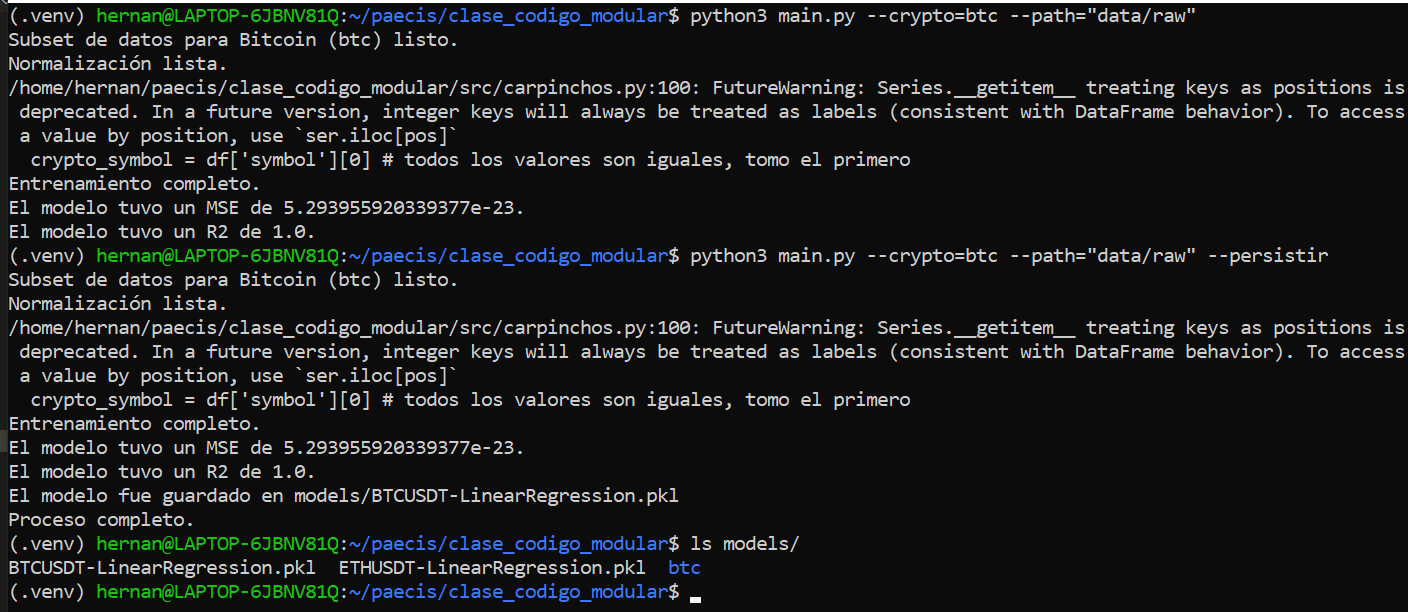

### Cierre

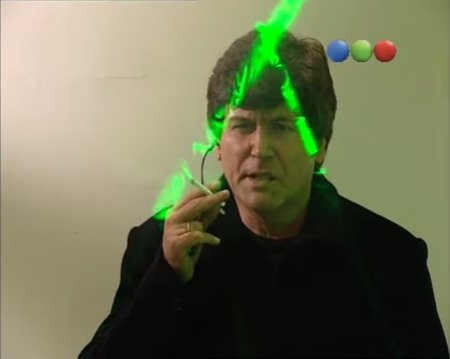

*más humor no apto centennials*

¡Te aseguro que no es para nada poca cosa haber llegado hasta acá! Como siempre, repito que la idea no es que te memorices exactamente TODO lo que ves acá, sino que veas cómo construir un proyecto escalable.

Empezamos siempre con el código más elemental y rústico posible, así "a lo bestia", y después vamos iterando y mejorando. Sobre esto se pueden construir muchas cosas: por ejemplo, podrías agregarle la ruta de salida del modelo, arreglar ese otro warning que nos tira, incorporarle otros algoritmos, etc.

El próximo paso: ¡compartir todo esto que hicimos con el mundo! Pero eso en la próxima clase. ¡Nos vemos!